# Matplotlib


## Install packages

You can use both [pip](https://pypi.org/project/pip/) or [astral/uv](https://docs.astral.sh/uv/).


In [2]:
!uv pip install -q \
    pandas==2.3.2 \
    pandas-stubs==2.3.2.250827 \
    numpy==2.3.2 \
    matplotlib==3.10.6

## Import packages


In [ ]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Usage


### Plots


#### Basic Plot


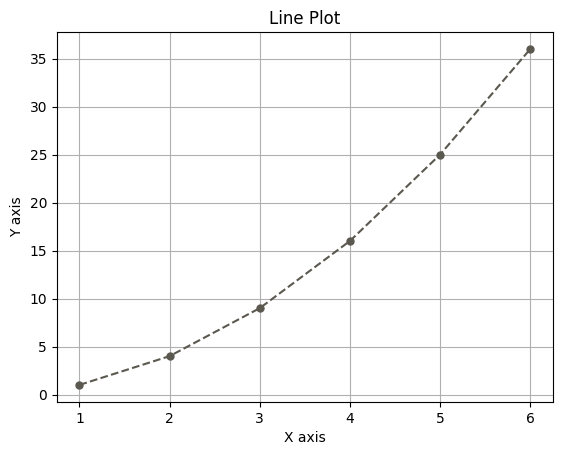

In [ ]:
line_x_values = [1, 2, 3, 4, 5, 6]
line_y_values = list(map(lambda x: x**2, line_x_values))

plt.plot(
    line_x_values,
    line_y_values,
    color="#5B584F",
    linestyle="--",
    linewidth="1.5",
    marker="o",
    markersize="5",
)

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Line Plot")
plt.grid(True)
plt.show()

#### Multiple Plots


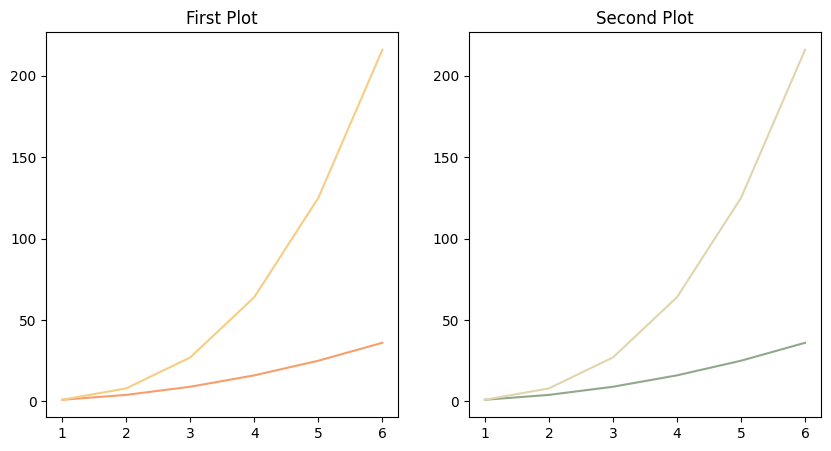

In [ ]:
multiplot_x_values = [1, 2, 3, 4, 5, 6]
multiplot_y1_values = list(map(lambda x: x**2, multiplot_x_values))
multyplot_y2_values = list(map(lambda x: x**3, multiplot_x_values))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # rows, columns, plot "slot"
plt.plot(multiplot_x_values, multiplot_y1_values, color="#F79E6B")
plt.plot(multiplot_x_values, multyplot_y2_values, color="#F7CD82")
plt.title("First Plot")

plt.subplot(1, 2, 2)  # rows, columns, plot "slot"
plt.plot(multiplot_x_values, multiplot_y1_values, color="#92A78C")
plt.plot(multiplot_x_values, multyplot_y2_values, color="#E0D5AD")
plt.title("Second Plot")
plt.show()

#### Bar Plot


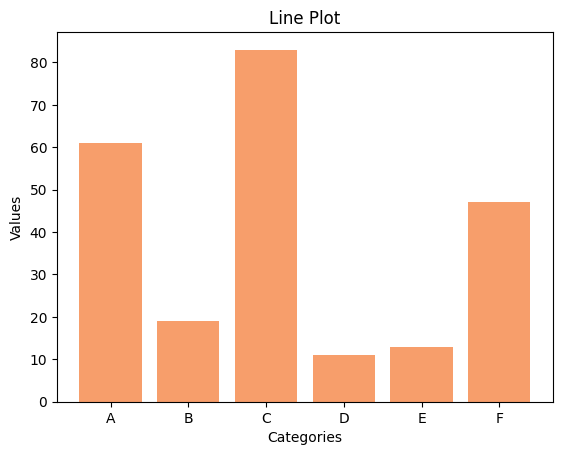

In [ ]:
bar_plot_categories = ["A", "B", "C", "D", "E", "F"]
bar_plot_values = [random.randint(1, 100) for _ in bar_plot_categories]

plt.bar(bar_plot_categories, bar_plot_values, color="#F79E6B")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Line Plot")
plt.show()

#### Histograms

Histogram plots represent the distribution of a dataset. The data is divided into beans that defines X axis, while Y axis show the count of data points in each bin.


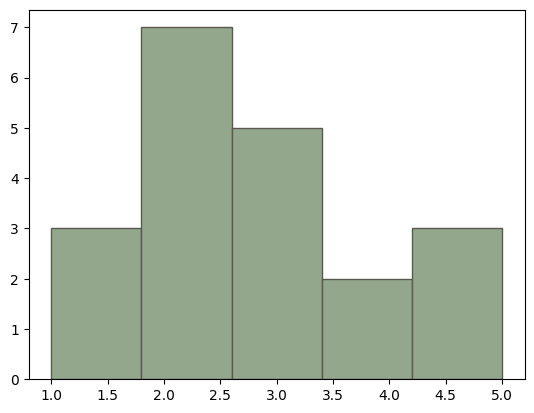

In [ ]:
histogram_data = [random.randint(1, 5) for _ in range(20)]

plt.hist(histogram_data, bins=5, color="#92A78C", edgecolor="#5B584F")
plt.show()

#### Scatter Plot


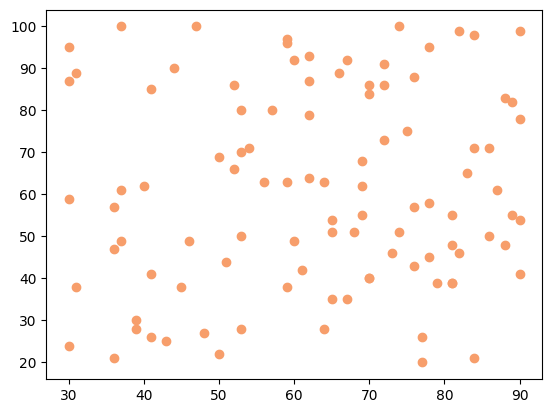

In [ ]:
scatter_x_values = [random.randint(30, 90) for _ in range(100)]
scatter_y_values = [random.randint(20, 100) for _ in range(100)]

plt.scatter(scatter_x_values, scatter_y_values, color="#F79E6B")
plt.show()

#### Pie Chart


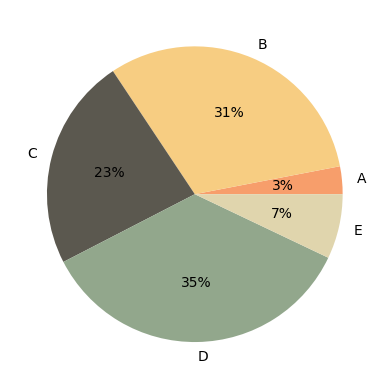

In [ ]:
pie_chart_labels = ["A", "B", "C", "D", "E"]
pie_chart_sizes = [random.randint(1, 50) for _ in range(5)]
colors = ["#F79E6B", "#F7CD82", "#5B584F", "#92A78C", "#E0D5AD"]

plt.pie(
    x=pie_chart_sizes,
    labels=pie_chart_labels,
    colors=colors,
    autopct="%1.0f%%",
)
plt.show()

In [ ]:
size = 10

start_date = pd.to_datetime("2023-01-01")

data_for_aggregation = {
    "order_id": np.arange(1, size + 1),
    "product": np.random.choice(
        ["Phone", "Laptop", "Keyboard", "Mouse", "Monitor"], size=size
    ),
    "region": np.random.choice(["North", "South", "East", "West"], size=size),
    "price": np.random.randint(100, 2000, size=size),
    "quantity": np.random.randint(1, 10, size=size),
    "order_date": start_date
    + pd.to_timedelta(np.random.randint(0, 365, size=size), unit="D"),
}

dataframe_for_aggregation = pd.DataFrame(data_for_aggregation)

dataframe_for_aggregation.head(10)

,order_id,product,region,price,quantity,order_date
0,1,Mouse,East,1907,2,2023-03-02
1,2,Phone,West,375,4,2023-08-10
2,3,Monitor,West,550,3,2023-07-22
3,4,Keyboard,West,249,5,2023-12-16
4,5,Mouse,South,1829,6,2023-12-27
5,6,Mouse,West,1655,8,2023-05-22
6,7,Keyboard,North,1767,7,2023-05-18
7,8,Monitor,South,659,6,2023-09-16
8,9,Phone,West,1180,4,2023-06-07
9,10,Laptop,South,1660,6,2023-04-15


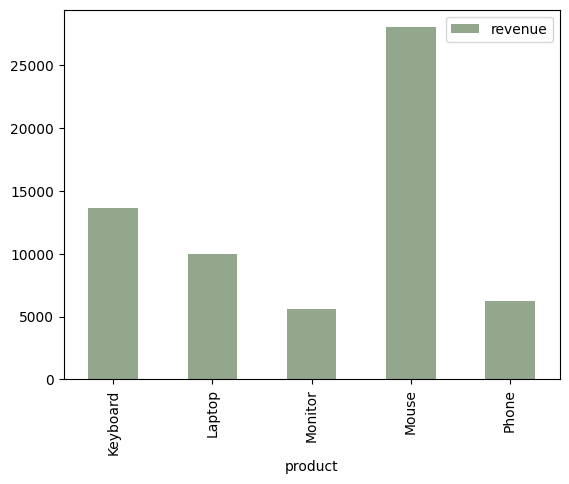

In [105]:
dataframe_for_aggregation.groupby(["product"]).agg(
    total_price=("price", "sum"),
    total_quantity=("quantity", "sum"),
    revenue=(
        "price",
        lambda price: (
            price * dataframe_for_aggregation.loc[price.index, "quantity"]
        ).sum(),
    ),
).reset_index()[["product", "revenue"]].plot(
    kind="bar",
    x="product",
    y="revenue",
    color="#92A78C",
)
plt.show()